<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.428705,96.344997,42.663136,41.376702,0.161616,280.975156,280.846872,0.128284
1,0.0,1.0,32.074454,84.219731,95.747071,71.006380,-0.137200,292.910436,292.970478,-0.060042
2,0.0,2.0,47.093330,29.354662,20.127244,93.835749,-0.321419,200.089565,200.445424,-0.355858
3,0.0,3.0,94.862495,45.162043,43.671046,90.665697,0.095468,284.456749,284.353400,0.103349
4,0.0,4.0,44.252972,63.507987,53.375045,68.022518,-0.564563,238.593958,239.153238,-0.559280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.213842,65.659752,64.666674,56.732320,-0.118320,275.154269,275.206041,-0.051772
59996,999.0,56.0,81.332551,90.522604,60.333598,22.877313,0.079187,265.145252,264.984527,0.160726
59997,999.0,57.0,43.811799,70.183444,29.118894,44.423861,-0.337889,197.200110,197.578961,-0.378851
59998,999.0,58.0,86.731232,89.543523,63.006036,53.524963,0.119658,302.925413,302.704575,0.220838


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.428705  96.344997  42.663136  41.376702  0.161616  280.975156   
      1.0    32.074454  84.219731  95.747071  71.006380 -0.137200  292.910436   
      2.0    47.093330  29.354662  20.127244  93.835749 -0.321419  200.089565   
      3.0    94.862495  45.162043  43.671046  90.665697  0.095468  284.456749   
      4.0    44.252972  63.507987  53.375045  68.022518 -0.564563  238.593958   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   78.213842  65.659752  64.666674  56.732320 -0.118320  275.154269   
      56.0   81.332551  90.522604  60.333598  22.877313  0.079187  265.145252   
      57.0   43.811799  70.183444  29.118894  44.423861 -0.337889  197.200110   
      58.0   86.731232  89.543523  63.006036  53.524963  0.119658  302.925413   
      59.0   49.314189  74.177322  43.476947  31.558798  0.089393  208.616650   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.846872  0.128284  
      1.0    292.970478 -0.060042  
      2.0    200.445424 -0.355858  
      3.0    284.353400  0.103349  
      4.0    239.153238 -0.559280  
...                 ...       ...  
999.0 55.0   275.206041 -0.051772  
      56.0   264.984527  0.160726  
      57.0   197.578961 -0.378851  
      58.0   302.704575  0.220838  
      59.0   208.544847  0.071804  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.428705  96.344997  42.663136  41.376702  0.161616  280.975156   
      1.0    32.074454  84.219731  95.747071  71.006380 -0.137200  292.910436   
      2.0    47.093330  29.354662  20.127244  93.835749 -0.321419  200.089565   
      3.0    94.862495  45.162043  43.671046  90.665697  0.095468  284.456749   
      4.0    44.252972  63.507987  53.375045  68.022518 -0.564563  238.593958   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   78.213842  65.659752  64.666674  56.732320 -0.118320  275.154269   
      56.0   81.332551  90.522604  60.333598  22.877313  0.079187  265.145252   
      57.0   43.811799  70.183444  29.118894  44.423861 -0.337889  197.200110   
      58.0   86.731232  89.543523  63.006036  53.524963  0.119658  302.925413   
      59.0   49.314189  74.177322  43.476947  31.558798  0.089393  208.616650   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.846872  0.128284  
      1.0    292.970478 -0.060042  
      2.0    200.445424 -0.355858  
      3.0    284.353400  0.103349  
      4.0    239.153238 -0.559280  
...                 ...       ...  
999.0 55.0   275.206041 -0.051772  
      56.0   264.984527  0.160726  
      57.0   197.578961 -0.378851  
      58.0   302.704575  0.220838  
      59.0   208.544847  0.071804  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.428705,96.344997,42.663136,41.376702,0.161616,280.975156,280.846872,0.128284
1,0.0,1.0,32.074454,84.219731,95.747071,71.006380,-0.137200,292.910436,292.970478,-0.060042
2,0.0,2.0,47.093330,29.354662,20.127244,93.835749,-0.321419,200.089565,200.445424,-0.355858
3,0.0,3.0,94.862495,45.162043,43.671046,90.665697,0.095468,284.456749,284.353400,0.103349
4,0.0,4.0,44.252972,63.507987,53.375045,68.022518,-0.564563,238.593958,239.153238,-0.559280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.213842,65.659752,64.666674,56.732320,-0.118320,275.154269,275.206041,-0.051772
59996,999.0,56.0,81.332551,90.522604,60.333598,22.877313,0.079187,265.145252,264.984527,0.160726
59997,999.0,57.0,43.811799,70.183444,29.118894,44.423861,-0.337889,197.200110,197.578961,-0.378851
59998,999.0,58.0,86.731232,89.543523,63.006036,53.524963,0.119658,302.925413,302.704575,0.220838


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.428705  96.344997  42.663136  41.376702  0.161616  280.975156   
      1.0    32.074454  84.219731  95.747071  71.006380 -0.137200  292.910436   
      2.0    47.093330  29.354662  20.127244  93.835749 -0.321419  200.089565   
      3.0    94.862495  45.162043  43.671046  90.665697  0.095468  284.456749   
      4.0    44.252972  63.507987  53.375045  68.022518 -0.564563  238.593958   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   78.213842  65.659752  64.666674  56.732320 -0.118320  275.154269   
      56.0   81.332551  90.522604  60.333598  22.877313  0.079187  265.145252   
      57.0   43.811799  70.183444  29.118894  44.423861 -0.337889  197.200110   
      58.0   86.731232  89.543523  63.006036  53.524963  0.119658  302.925413   
      59.0   49.314189  74.177322  43.476947  31.558798  0.089393  208.616650   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.846872  0.128284  
      1.0    292.970478 -0.060042  
      2.0    200.445424 -0.355858  
      3.0    284.353400  0.103349  
      4.0    239.153238 -0.559280  
...                 ...       ...  
999.0 55.0   275.206041 -0.051772  
      56.0   264.984527  0.160726  
      57.0   197.578961 -0.378851  
      58.0   302.704575  0.220838  
      59.0   208.544847  0.071804  

[60000 rows x 8 columns]

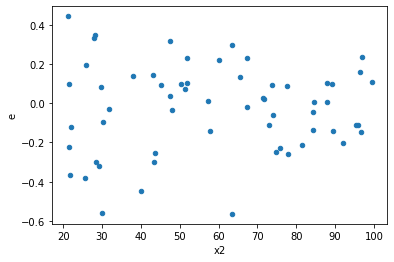

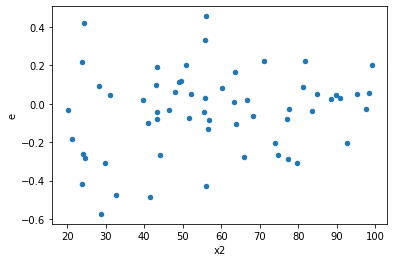

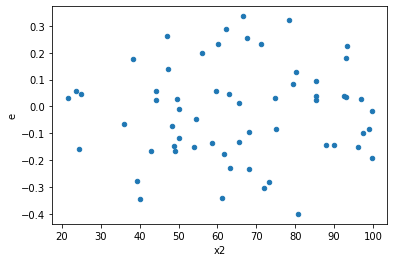

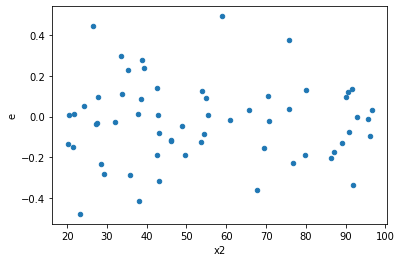

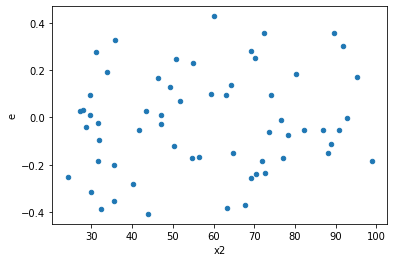

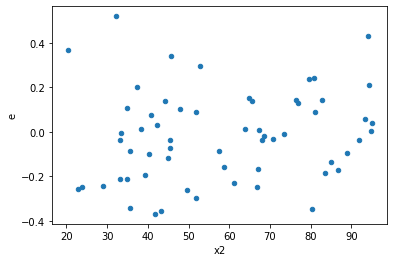

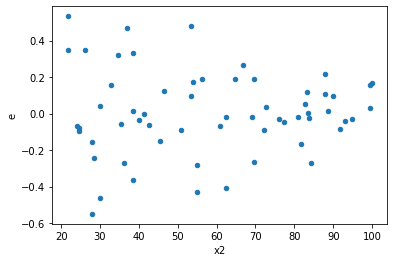

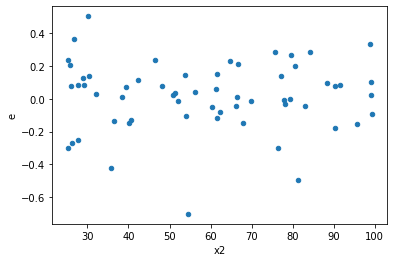

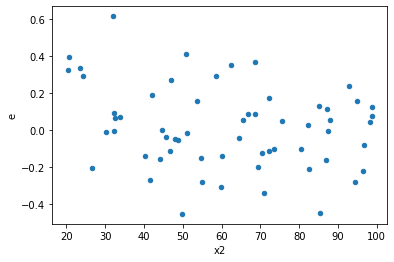

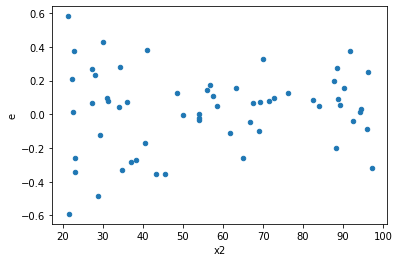

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,27.0,25.0,0.6855887716748476,1.8201272105184318,0.02539217672869806,0.07280508842073727,2.8672251772119037,0.009903153540150145,0.9950484232299249,0.004951576770075072,Reject005=0 : Heteroscedasticity
10.0,22.0,30.0,0.6435902667531059,1.9655042883827312,0.02925410303423209,0.0655168096127577,2.2395767710290864,0.04067765821850933,0.9796611708907453,0.020338829109254664,Reject005=0 : Heteroscedasticity
13.0,29.0,23.0,1.5483043199014694,1.2530584311541149,0.05338980413453343,0.05448080135452673,1.0204345611990666,0.9717255835432836,0.5141372082283582,0.4858627917716418,Reject005=1 : Homoscedasticity
14.0,29.0,23.0,0.91395698803567,0.8587169164482259,0.031515758208126556,0.0373355181064446,1.1846619034162211,0.6831803351178505,0.6584098324410748,0.34159016755892524,Reject005=1 : Homoscedasticity
16.0,26.0,26.0,0.9866965218344459,1.265064815281875,0.03794986622440177,0.04865633904930289,1.2821214905368192,0.5308323378402364,0.7345838310798818,0.2654161689201182,Reject005=1 : Homoscedasticity
18.0,24.0,28.0,0.9012919985376259,2.358930958723919,0.037553833272401076,0.08424753424013996,2.2433804194911535,0.04153121061433018,0.9792343946928349,0.02076560530716509,Reject005=0 : Heteroscedasticity
20.0,26.0,26.0,0.8789413292895893,1.2098698498224543,0.03380543574190728,0.04653345576240209,1.3765080893400932,0.4206976819209882,0.7896511590395059,0.2103488409604941,Reject005=1 : Homoscedasticity
21.0,21.0,31.0,0.7069186425088184,2.0876678501467665,0.033662792500419925,0.06734412419828278,2.000550732606117,0.0775173792825834,0.9612413103587083,0.0387586896412917,Reject005=1 : Homoscedasticity
23.0,31.0,21.0,0.7990037887388451,0.7340738072970834,0.025774315765769197,0.0349558955855754,1.3562298182130692,0.4711726374805565,0.7644136812597218,0.23558631874027824,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,32.0,1.1664387225072192,1.2596944042625464,0.05832193612536096,0.039365450133204576,0.6749681637555708,0.3589604271473487,Reject005=1 : Homoscedasticity
1.0,24.0,28.0,1.034077318588215,0.9126190920049679,0.04308655494117563,0.032593539000177425,0.7564665832456574,0.49088160256671914,Reject005=1 : Homoscedasticity
2.0,22.0,30.0,0.7706547607178068,0.825613276164167,0.0350297618508094,0.02752044253880557,0.7856303064809353,0.5638878134501673,Reject005=1 : Homoscedasticity
3.0,20.0,32.0,0.8916414979621782,0.859845124287424,0.044582074898108906,0.026870160133982,0.6027121930819282,0.23674561450182782,Reject005=1 : Homoscedasticity
4.0,32.0,20.0,1.4637332774505663,0.8961618995960724,0.045741664920330195,0.04480809497980362,0.9795903812825221,0.934744824381627,Reject005=1 : Homoscedasticity
5.0,29.0,23.0,1.7263173500855502,0.41023254298473194,0.05952818448570863,0.017836197521075303,0.2996260960277962,0.002532896769490323,Reject005=0 : Heteroscedasticity
6.0,27.0,25.0,0.6855887716748476,1.8201272105184318,0.02539217672869806,0.07280508842073727,2.8672251772119037,0.009903153540150145,Reject005=0 : Heteroscedasticity
7.0,27.0,25.0,1.6244783381514518,0.8360675641556385,0.0601658643759797,0.03344270256622554,0.5558418035389687,0.13834439335160054,Reject005=1 : Homoscedasticity
8.0,27.0,25.0,1.2299277884967643,1.026750063316982,0.045552881055435715,0.04107000253267928,0.901589571967995,0.789798858816501,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      853
Reject005=0 : Heteroscedasticity    147
Name: Result_test, dtype: int64